# Python OpenCV 입문 - OpenCV 프로그래밍 기초
## Basic2
---
---
### 1. 데이터 타입 확인하기

* 데이터 shape
* 데이터 size
* 데이터 dtype

In [1]:
import cv2

img = cv2.imread('data/messi5.jpg')

print(img.shape)
print(img.size)
print(img.dtype)

(342, 548, 3)
562248
uint8


---
### 2. 이미지 나누고 합치기
* 이미지 나누기
* 이미지 합치기

In [2]:
import cv2

img = cv2.imread('data/messi5.jpg')

b,g,r = cv2.split(img)

cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

img = cv2.merge((b,g,r))

cv2.imshow('image',img)
cv2.waitKey()
cv2.destroyAllWindows()

---
### 3. 이미지 리사이즈를 이용한 합치기
* 이미지 합치기
* 이미지 리사이즈

In [ ]:
import cv2

img = cv2.imread('data/messi5.jpg')
img2 = cv2.imread('data/opencv-logo.png')

ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

img = cv2.resize(img, (512, 512))
img2 = cv2.resize(img2, (512,512))

dst = cv2.addWeighted(img, .9, img2, .1, 0)
cv2.imshow('image',dst)
cv2.waitKey()
cv2.destroyAllWindows()

---
### 4. bitwise 연산
* and 연산
* or 연산
* Xor 연산
* Not 연산

In [ ]:
from IPython.display import Image 
Image("data/bitwise.png")

In [ ]:
import cv2
import numpy as np

img1 = np.zeros((250, 500, 3), np.uint8)
img1 = cv2.rectangle(img1, (200,0), (300,100),(255,255,255), -1)
img2 = np.zeros((250, 500, 3), np.uint8)
img2 = cv2.rectangle(img2, (250,0), (500,250), (255,255,255), -1)

bitAnd = cv2.bitwise_and(img2, img1)
bitOr = cv2.bitwise_or(img2, img1)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot1 = cv2.bitwise_not(img1)
bitNot2 = cv2.bitwise_not(img2)

cv2.imshow("img1", img1)
cv2.imshow("img2", img2)
cv2.imshow('bitAnd', bitAnd)
cv2.imshow('bitOr', bitOr)
cv2.imshow('bitXor', bitXor)
cv2.imshow('bitNot1', bitNot1)
cv2.imshow('bitNot2', bitNot2)

cv2.waitKey(0)
cv2.destroyAllWindows()

---
### 5.Trackbar
* 트랙바 만들기
* 트랙바로 배경화면 색상 바꾸기

In [ ]:
import numpy as np
import cv2 as cv

def nothing(x):
    print(x)

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')

cv.createTrackbar('B', 'image', 0, 255, nothing)
cv.createTrackbar('G', 'image', 0, 255, nothing)
cv.createTrackbar('R', 'image', 0, 255, nothing)

switch = '0 : OFF\n 1 : ON'
cv.createTrackbar(switch, 'image', 0, 1, nothing)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

    b = cv.getTrackbarPos('B', 'image')
    g = cv.getTrackbarPos('G', 'image')
    r = cv.getTrackbarPos('R', 'image')
    s = cv.getTrackbarPos(switch, 'image')

    if s == 0:
       img[:] = 0
    else:
       img[:] = [b, g, r]


cv.destroyAllWindows()

---
* 트랙바 포지션 값 이미지에 띄우기

In [ ]:
import numpy as np
import cv2 as cv

def nothing(x):
    print(x)

# Create a black image, a window
cv.namedWindow('image')

cv.createTrackbar('CP', 'image', 10, 400, nothing)

switch = 'color/gray'
cv.createTrackbar(switch, 'image', 0, 1, nothing)

while(1):
    img = cv.imread('data/lena.jpg')
    pos = cv.getTrackbarPos('CP', 'image')
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(img, str(pos), (50, 150), font, 6, (0, 0, 255), 10)

    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

    s = cv.getTrackbarPos(switch, 'image')

    if s == 0:
       pass
    else:
       img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    img = cv.imshow('image',img)

cv.destroyAllWindows()

---
---
## 이미지 처리
### 1. HSV란?
* 색을 표현하는 하나의 방법
* 색상(Hue), 채도(Saturation), 명도(Value)의 좌표로 이루어짐

In [ ]:
from IPython.display import Image 
Image("data/hsv.jpg")

* 색상값은 각도로 표현되며 지정한 색이 원기둥의 수평 단면의 어느 방향에 위치하는지를 지정한다.
* 채도는 반지름에 해당하며 정 중앙에 무채색이 위치하며 원기둥의 겉면은 가장 진한 채도를 갖는다.
* 명도는 높이에 해당하며 위로 갈수록 색이 밝다.

---
### 2. Detecting Object by HSV
* HSV 값을 이용하여 이미지 내 물체 감지하기

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)

while True:
    frame = cv2.imread('data/smarties.png')

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("LH", "Tracking")
    l_s = cv2.getTrackbarPos("LS", "Tracking")
    l_v = cv2.getTrackbarPos("LV", "Tracking")

    u_h = cv2.getTrackbarPos("UH", "Tracking")
    u_s = cv2.getTrackbarPos("US", "Tracking")
    u_v = cv2.getTrackbarPos("UV", "Tracking")

    l_b = np.array([l_h, l_s, l_v])
    u_b = np.array([u_h, u_s, u_v])

    mask = cv2.inRange(hsv, l_b, u_b)

    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)

    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()
    

---
* 영상 내 물체 감지하기

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

cap = cv2.VideoCapture(0);

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)

while True:
    #frame = cv2.imread('smarties.png')
    _, frame = cap.read()

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("LH", "Tracking")
    l_s = cv2.getTrackbarPos("LS", "Tracking")
    l_v = cv2.getTrackbarPos("LV", "Tracking")

    u_h = cv2.getTrackbarPos("UH", "Tracking")
    u_s = cv2.getTrackbarPos("US", "Tracking")
    u_v = cv2.getTrackbarPos("UV", "Tracking")

    l_b = np.array([l_h, l_s, l_v])
    u_b = np.array([u_h, u_s, u_v])

    mask = cv2.inRange(hsv, l_b, u_b)

    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

---
### 3. Simple Threshold
* 임계처리를 하여 이미지를 이진화 할 수 있다.
* 임계값보다 작으면 흑, 크면 백이 된다.

    * cv2.THRESH_BINARY: threshold보다 크면 value이고 아니면 0으로 바꾸어 줍니다. 

    * cv2.THRESH_BINARY_INV: threshold보다 크면 0이고 아니면 value로 바꾸어 줍니다.   

    * cv2.THRESH_TRUNC: threshold보다 크면 value로 지정하고 작으면 기존의 값 그대로 사용한다. 

    * cv2.THRESH_TOZERO: treshold_value보다 크면 픽셀 값 그대로 작으면 0으로 할당한다. 

    * cv2.THRESH_TOZERO_INV: threshold_value보다 크면 0으로 작으면 그대로 할당해준다. 


In [ ]:
import cv2 as cv
import numpy as np

img = cv.imread('data/gradient.png',0)
_, th1 = cv.threshold(img, 50, 255, cv.THRESH_BINARY)
_, th2 = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV)
_, th3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
_, th4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
_, th5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)


cv.imshow("Image", img)
cv.imshow("th1", th1)
cv.imshow("th2", th2)
cv.imshow("th3", th3)
cv.imshow("th4", th4)
cv.imshow("th5", th5)

cv.waitKey(0)
cv.destroyAllWindows()

---
### 4. Adaptive Threshold
* 구역별로 thresholding 값을 구해줘서 적용시키는 방법 

In [ ]:
import cv2 as cv
import numpy as np

img = cv.imread('data/sudoku.png',0)
_, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2);
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2);

cv.imshow("Image", img)
cv.imshow("THRESH_BINARY", th1)
cv.imshow("ADAPTIVE_THRESH_MEAN_C", th2)
cv.imshow("ADAPTIVE_THRESH_GAUSSIAN_C", th3)

cv.waitKey(0)
cv.destroyAllWindows()

---
### 5. Matplotlib
* 그래프를 쉽게 그릴 수 있는 라이브러리 : matplotlib
* matplotlib 설치하기

In [ ]:
!pip install matplotlib

* matplotlib으로 이미지 띄우기

In [ ]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg', -1)
#cv2.imshow('image', img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

* matplotlib으로 여러장의 이미지 한번에 띄우기

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/gradient.png',0)
_, th1 = cv.threshold(img, 50, 255, cv.THRESH_BINARY)
_, th2 = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV)
_, th3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
_, th4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
_, th5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, th1 ,th2 ,th3 ,th4, th5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
#cv.imshow("Image", img)
#cv.imshow("th1", th1)
#cv.imshow("th2", th2)
#cv.imshow("th3", th3)
#cv.imshow("th4", th4)
#cv.imshow("th5", th5)
plt.show()
#cv.waitKey(0)
#cv.destroyAllWindows()

---
### 6. Morphological Transformation
* 형태 변형은 이미지 모양을 기반으로 하는 몇가지 간단한 동작을 말함
* 동작을 위해서는 두 개의 입력이 필요
* 이미지와 구조 요소(커널)이 필요
* 커널은 동작의 형태를 지정하는 요소

    * Dilation(팽창 효과)
    > 커널 아래 하나의 픽셀이 1이면 1을 반환함
    > 객체의 크기가 커지는 효과
    > 객체를 강조하는 효과
    > 객체의 깨진 부분을 메우는데 유용하게 사용됨
    
    * Erosion(침식 효과)
    > 커널의 모든 픽셀이 1일 때만 1을 반환함
    > 객체의 크기가 줄어든 효과
    > 화이트 노이즈를 제거하는 효과
    > 객체를 분리하는데 유용
    
    * Opening(열림 효과)
    > 팽창 효과를 먼저 적용하고 침식 효과를 적용
    > 노이즈를 제거하는 용도로 많이 쓰임
    
    * Closing(닫힘 효과)
    > 침식 효과를 먼저 적용하고 팽창 효과를 적용
    > 작은 점들을 없앨 떄 유용함
    
    * Gradient
    > 팽창 효과와 침식 효과의 차이
    
    * TopHat
    > 원본 이미지와 열림 효과의 차이

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/smarties.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)

kernal = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernal, iterations=2)
erosion = cv2.erode(mask, kernal, iterations=1)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal)
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal)

titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'mg', 'th']
images = [img, mask, dilation, erosion, opening, closing, mg, th]

for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/j.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)

kernal = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernal, iterations=2)
erosion = cv2.erode(mask, kernal, iterations=1)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal)
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal)

titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'mg', 'th']
images = [img, mask, dilation, erosion, opening, closing, mg, th]

for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

---
### 7. Smooting Image
* 필터를 이용하여 이미지에 효과 적용

* Blur : 흐리기
* Average : 매끄러운 모습
* Gaussian Blur : 안개효과
* Median Blur : Outlier 에 강함
* BilaterialFilter : 선명도 증가, 노이즈 감소

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)
blur = cv2.blur(img, (5, 5))
gblur = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)
bilateralFilter = cv2.bilateralFilter(img, 9, 75, 75)

titles = ['image', '2D Convolution', 'blur', 'GaussianBlur', 'median', 'bilateralFilter']
images = [img, dst, blur, gblur, median, bilateralFilter]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

---
### 8. Image Gradient 와 Edge 검출
* 이미지의 강도 또는 색상의 방향 변화를 Image Gradient라고 한다.
* Edge 검출을 하기 위해서는 Image Gradeinet를 알아야한다.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("data/sudoku.png", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined']
images = [img, lap, sobelX, sobelY, sobelCombined]
for i in range(5):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

---
### 9. Canny Edge Detector
* 이미지에서 큰 부분의 외곽선을 감지하는 알고리즘
* 가우시안 필터를 이용해서 노이즈 줄이기
* 그라디언트 계산
* Non Maximum suppression
* Double Threshold
* Edge Tracking by Hysteresis

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("data/lena.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(img, 100, 200)

titles = ['image', 'canny']
images = [img, canny]
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("data/messi5.jpg", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img,100,200)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

---
### 10. Scale and Image Pyramids
* Scale : 스케일에 따라서 물체를 어떻게 인식하는지 달라질 수 있음
Ex) Scale이 큰 상태에서 숲을 보면 나무가 보이지만
Scale이 작은 상태에서 숲을 보면 나뭇가지와 나뭇잎이 보임
Scale이 커질 수록 이미지가 축소됨 -> Scale이 클수록 나뭇잎을 강조함
* Image Pyramid : 이미지를의 크기를 단계적으로 생성한 이미지 집합


In [ ]:
from IPython.display import Image 
Image("data/imagePyramids.jpg")

In [ ]:
Image("data/imagePyramid.png")

* Scale Step : 여러 크기의 물체를 검출할 목적인 경우 스케일을 보통 1.1배(또는 1.05배)씩 증가시켜가면서 이미지 피라미드를 구성한다.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg')
lr1 = cv2.pyrDown(img)
lr2 = cv2.pyrDown(lr1)
hr2 = cv2.pyrUp(lr2)

cv2.imshow('Original Image', img)
cv2.imshow('pyrDown 1 image', lr1)
cv2.imshow('pyrDown 2 image', lr2)
cv2.imshow('pyrUp 1 image', hr2)

cv2.waitKey(0)
cv2.destroyAllWindows()

* Gaussian Pyramids : 이미지 피라미드를 생성할 때, 일련의 블러링(blurring)과 다운 샘플링(sub sampling)을 통해 이미지를 1/2씩 축소시켜 가면서 피라미드를 생성하는 경우도 있다 (블러링->1/2축소->블러링->1/2축소->...).

In [ ]:
Image("data/gaussianPyramids.jpg")

In [ ]:
import cv2
import numpy as np
img = cv2.imread('data/lena.jpg')
layer = img.copy()
gp = [layer]

for i in range(6):
    layer = cv2.pyrDown(layer)
    gp.append(layer)
    cv2.imshow((str(i)), layer)
    
cv2.imshow('Original Image', img)
cv2.waitKey()
cv2.destroyAllWindows()

* Laplacian Pyramids : 이미지를 확장했을 때 원본과의 차이를 저장해 놓는 것

ex) Laplacian Pyramids 를 이용하면 이미지를 resize 해도 화질이 깨지지 않도록 할 수 있음

In [ ]:
import cv2
import numpy as np
img = cv2.imread('data/lena.jpg')
layer = img.copy()
gp = [layer]

for i in range(6):
    layer = cv2.pyrDown(layer)
    gp.append(layer)
    #cv2.imshow((str(i)), layer)
    
layer = gp[5]
cv2.imshow('upper level Haussian Pyramid', layer)
lp = [layer]

for i in range(5, 0, -1):
    gaussian_extended = cv2.pyrUp(gp[i])
    laplacian = cv2.subtract(gp[i-1], gaussian_extended)
    cv2.imshow(str(i), laplacian)
    
cv2.imshow('Original Image', img)
cv2.waitKey()
cv2.destroyAllWindows()

---
### 11. Image Blending
* 두 이미지를 그냥 합쳤을 때

In [ ]:
import cv2
import numpy as np

apple = cv2.imread('data/apple.jpg')
orange = cv2.imread('data/orange.jpg')
print(apple.shape)
print(orange.shape)
apple_orange = np.hstack((apple[:, :256], orange[:, 256:]))


cv2.imshow("apple", apple)
cv2.imshow("orange", orange)
cv2.imshow("apple_orange", apple_orange)
#cv2.imshow("apple_orange_reconstruct", apple_orange_reconstruct)
cv2.waitKey(0)
cv2.destroyAllWindows()

* Image Blending Steps:
    * 두 이미지를 불러오기
    * 각 이미지의 가우시안 피라미드를 찾기
    * 가우시안 피라미드를 통해서 라플라시안 피라미드를 찾기
    * 라플라시안 피라미드의 각레벨에 대한 두 이미지를 조합
    * ㅈ합한 이미지 피라미드를 통해서 원본 이미지를 다시생성

In [ ]:
import cv2
import numpy as np
apple = cv2.imread('data/apple.jpg')
orange = cv2.imread('data/orange.jpg')
print(apple.shape)
print(orange.shape)
apple_orange = np.hstack((apple[:, :256], orange[:, 256:]))

# generate Gaussian pyramid for apple
apple_copy = apple.copy()
gp_apple = [apple_copy]
for i in range(6):
    apple_copy = cv2.pyrDown(apple_copy)
    gp_apple.append(apple_copy)


# generate Gaussian pyramid for orange
orange_copy = orange.copy()
gp_orange = [orange_copy]
for i in range(6):
    orange_copy = cv2.pyrDown(orange_copy)
    gp_orange.append(orange_copy)

# generate Laplacian Pyramid for apple
apple_copy = gp_apple[5]
lp_apple = [apple_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_apple[i])
    laplacian = cv2.subtract(gp_apple[i-1], gaussian_expanded)
    lp_apple.append(laplacian)

# generate Laplacian Pyramid for orange
orange_copy = gp_orange[5]
lp_orange = [orange_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_orange[i])
    laplacian = cv2.subtract(gp_orange[i-1], gaussian_expanded)
    lp_orange.append(laplacian)

# Now add left and right halves of images in each level
apple_orange_pyramid = []
n = 0
for apple_lap, orange_lap in zip(lp_apple, lp_orange):
    n += 1
    cols, rows, ch = apple_lap.shape
    laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))
    apple_orange_pyramid.append(laplacian)
# now reconstruct
apple_orange_reconstruct = apple_orange_pyramid[0]
for i in range(1, 6):
    apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)
    apple_orange_reconstruct = cv2.add(apple_orange_pyramid[i], apple_orange_reconstruct)

cv2.imshow("apple", apple)
cv2.imshow("orange", orange)
cv2.imshow("apple_orange", apple_orange)
cv2.imshow("apple_orange_reconstruct", apple_orange_reconstruct)
cv2.waitKey(0)
cv2.destroyAllWindows()

---
### 12. Contours
* 이미지 등치선(Contour)이란 이미지에서 동일한 색이나 강도값을 가지는 포인트를 연결한 모든 연속된 선을 의미
* 객체 인식이나 식별을 위해 자주 쓰임
* Threshold 나 Canny를 적용해서 바이너리 이미지를 만든 후 그 이미지에서 등차선을 추출할 수 있음



* 검출 모드
    - RETR_EXTERNAL: 가장 바깥 외곽선만 검출
    - RETR_LIST: 모든 외곽선 검출
    - RETR_CCOMP: 2레벨 계층 구조로 외곽선 검출
    - RETR_TREE: 트리 구조로 모든 외곽선 검출
* 근사화 방법
    - CHAIN_APPROX_NONE: 근사화 없음
    - CHAIN_APPROX_SIMPLE: 수직선, 수평선, 대각선에 대해 끝점만 사용하여 압축
    - CHAIN_APPROX_TC89_L1: Teh & Cain L1 근사화
    - CHAIN_APPROX_TC89_KCOS: Teh & Cain k cos 근사화

In [ ]:
import cv2

img = cv2.imread('data/opencv-logo.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 70, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#등치선 추출 대상 이미지, 등치선 추출 방식, 등치선 결과에 대한 근사치화 방식
print("Number of contours = " + str(len(contours)))
print(contours[0])

cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
cv2.drawContours(imgray, contours, -1, (0, 255, 0), 3)

cv2.imshow('Image', img)
cv2.imshow('Image GRAY', imgray)
cv2.waitKey(0)
cv2.destroyAllWindows()

---
### 13. Motion Detection, Motion Tracking

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture('data/vtest.avi')

ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    dff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(dff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations = 3)
    contours, _  = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    #cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2)
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv2.contourArea(contour) < 900:
            continue
        cv2.rectangle(frame1, (x,y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame1, 'Status : {}'.format('Movement'),
                    (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
    
    cv2.imshow('feed', frame1)

    frame1 = frame2
    ret, frame2 = cap.read()
    
    if cv2.waitKey(40) == 27:
        break

        
cv2.destroyAllWindows()
cap.release()

---
### 14. Detect simple Geometric Shapes
* 외곽선 근사화
```cv2.approxPolyDp(curve, epsilon, closed, approxCurve=None) -> approxCurve```

> curve : 입력 곡선 좌표

> epsilon : 근사화 정밀도 조절

> closed : True를 전달하면 페곡선으로 간주

> approxCurve : 근사화된 곡선 좌표

In [ ]:
import numpy as np
import cv2

img = cv2.imread('data/shapes.jpg')
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thrash = cv2.threshold(imgGrey, 220, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(len(contours))
cv2.imshow("img", img)
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 4:
        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 10:
        cv2.putText(img, "Star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))


cv2.imshow("shapes", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

7
1.0
1.0
1.8793103448275863


---
### 15. Geometric Transformation
* 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업


In [ ]:
import cv2
import numpy as np

img = cv2.imread('data/messi5.jpg',0)
rows,cols = img.shape

M1 = np.float32([[1,0,100],[0,1,50]])
dst1 = cv2.warpAffine(img,M1,(cols,rows))

M2 = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst2 = cv2.warpAffine(img,M2,(cols,rows))

cv2.imshow('img',img)
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

* Projective Transformations : 원근감 표현, 4점 필요
* Affine Transformations : 평행을 이용, 3점 필요

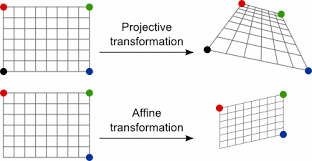

In [ ]:
from IPython.display import Image 
Image("data/geotrans.png")

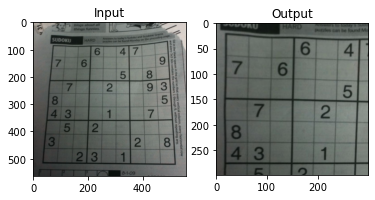

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('data/sudoku.png')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

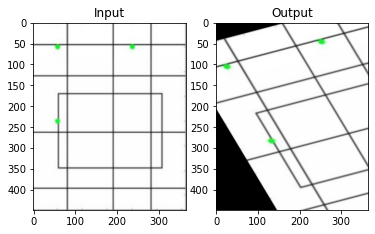

In [ ]:
img = cv2.imread('data/drawing.png')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)


dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

---
16. 얼굴 검출


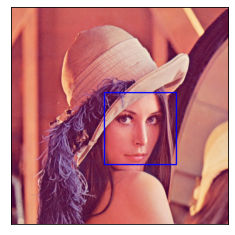

In [7]:
import cv2
from matplotlib import pyplot as plt
faceCascade= cv2.CascadeClassifier("data/haarcascade_frontalface_default.xml")

img = cv2.imread('data/lena.jpg')
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
faces = faceCascade.detectMultiScale(imgGray,1.1,4)
 
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import cv2
import numpy as np
 
###################################
widthImg=540
heightImg =640
#####################################
 
cap = cv2.VideoCapture(0)
cap.set(10,150)
 
def preProcessing(img):
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray,(5,5),1)
    imgCanny = cv2.Canny(imgBlur,200,200)
    kernel = np.ones((5,5))
    imgDial = cv2.dilate(imgCanny,kernel,iterations=2)
    imgThres = cv2.erode(imgDial,kernel,iterations=1)
    return imgThres
 
def getContours(img):
    biggest = np.array([])
    maxArea = 0
    contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area>5000:
            #cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            if area >maxArea and len(approx) == 4:
                biggest = approx
                maxArea = area
    cv2.drawContours(imgContour, biggest, -1, (255, 0, 0), 20)
    return biggest
 
def reorder (myPoints):
    myPoints = myPoints.reshape((4,2))
    myPointsNew = np.zeros((4,1,2),np.int32)
    add = myPoints.sum(1)
    #print("add", add)
    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] = myPoints[np.argmax(add)]
    diff = np.diff(myPoints,axis=1)
    myPointsNew[1]= myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]
    #print("NewPoints",myPointsNew)
    return myPointsNew
 
def getWarp(img,biggest):
    biggest = reorder(biggest)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0, 0], [widthImg, 0], [0, heightImg], [widthImg, heightImg]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    imgOutput = cv2.warpPerspective(img, matrix, (widthImg, heightImg))
 
    imgCropped = imgOutput[20:imgOutput.shape[0]-20,20:imgOutput.shape[1]-20]
    imgCropped = cv2.resize(imgCropped,(widthImg,heightImg))
 
    return imgCropped
 
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver
 
while True:
    success, img = cap.read()
    img = cv2.resize(img,(widthImg,heightImg))
    imgContour = img.copy()
 
    imgThres = preProcessing(img)
    biggest = getContours(imgThres)
    if biggest.size !=0:
        imgWarped=getWarp(img,biggest)
        # imageArray = ([img,imgThres],
        #           [imgContour,imgWarped])
        imageArray = ([imgContour, imgWarped])
        cv2.imshow("ImageWarped", imgWarped)
    else:
        # imageArray = ([img, imgThres],
        #               [img, img])
        imageArray = ([imgContour, img])
 
    stackedImages = stackImages(0.6,imageArray)
    cv2.imshow("WorkFlow", stackedImages)
 
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

## Practice

1.Resize and Crop
- Resize
- Crop
한 이미지를 불러와서 위의 요소들이 각각 무엇을 의미하는지 주석으로 설명하고 코드로 작성하여 출력하시오.


In [ ]:
import cv2
#Code here

2. 기본 함수
- GaussianBlur
- Canny
- dilate
- erode

한 이미지를 불러와서 위의 요소들이 각각 무엇을 의미하는지 주석으로 설명하고 코드로 작성하여 출력하시오.

In [ ]:
import cv2
#Code here

3. Warp Perspective

기울어진 사진을 정사각형으로 똑바르게 펴는 코드를 작성하시오.

In [ ]:
import cv2
#Code here

4. Eye detection

lena.jpg 에서 눈을 검출하고 사각형 치시오.

In [ ]:
import cv2
#Code here